<a href="https://colab.research.google.com/github/SampMark/Deep-Learning/blob/main/Creating_Custom_Layers_and_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Programação Orientada a Objetos: utilização de classes e objetos na modelagem comparativa para diferentes arquiteturas**

O projeto de código a seguir utiliza uma abordagem flexível para construir e avaliar modelos de Redes Neurais com o TensorFlow/Keras. Além disso, o código explora diferentes combinações de arquiteturas de rede para comparar desempenho e generalização.

Conforme abordado por meio de exemplos no repositório sobre [Pensamento Computacional](https://github.com/SampMark/Computational-Thinking), utilizar a lógica de programação orientada a objetos (POO), com hierarquização por classes e objetos é fundamental para melhor a organização e reutilização de código.

* **Classes e Objetos**: uma classe serve como um molde para criar objetos, encapsulando dados (atributos) e comportamentos (métodos).

* **Herança**: permite que uma classe (subclasse) herde atributos e métodos de outra classe (superclasse), promovendo a reutilização de código e a criação de relações hierárquicas entre classes.
  * Como Python suporta **herança múltipla**, uma classe pode herdar de múltiplas classes base, permitindo a criação de classes que combinam funcionalidades de outras classes.

Alguns dos benefícios ao se utilizar a programação orientada a objetos (POO), como:

1. **Flexibilidade**: a criação da classe `custom_dense_layer` permite ajustar dinamicamente o número de neurônios e a inicialização dos pesos.
  * O uso de listas para configurar as camadas em `model_configs` simplifica a modificação e o teste de diferentes arquiteturas.

2. **Eficiência**: a implementação modular facilita a reusabilidade, economizando tempo em projetos futuros.
  * A inclusão de técnicas de regularização, como `Dropout` e `BatchNormalization`, ajuda a mitigar problemas de overfitting, promovendo uma melhor generalização.

3. **Modularidade**: o design estruturado, com funções separadas para recompilar, treinar e avaliar os modelos, permite que as etapas sejam reutilizadas e adaptadas a diferentes conjuntos de dados ou arquiteturas.
  * A definição de `model_configs` torna possível experimentar variações com mudanças mínimas no código.

4. **Experimentação Rápida**: o código promove iteração rápida em diferentes configurações, sendo crucial para testar hipóteses sobre o impacto de diferentes combinações de camadas e técnicas de regularização.

A estrutura apresentada combina flexibilidade, modularidade, eficiência e experimentação rápida, atendendo às necessidades de cientistas de dados que buscam desenvolver redes neurais personalizadas e otimizadas, ao mesmo tempo que facilita a reprodutibilidade e uma análise detalhada de resultados.

# **Importando e Instalando as Bibliotecas**

---



In [1]:
!pip install tensorflow pydot graphviz

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import pydot
from tensorflow.keras.layers import Layer, Softmax, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

## **Classe `custom_dense_layer`**: definindo uma classe para a camada densa (*fully connected*) personalizada

---

A classe personalizada para camadas densas (`custom_dense_layer`) serve para definir explicitamente a inicialização dos pesos, vieses e a função de ativação ReLU.

In [3]:
class custom_dense_layer(Layer):
    """
    Define uma classe para a camada densa (fully connected) personalizada com ativação ReLU.

    Args:
      units: Número de neurônios na camada.
    """
    def __init__(self, units=32):
        """
        Utiliza o construtor da classe e inicializa a camada.

        Args:
          units: Número de neurônios na camada (padrão: 32).
        """
        super(custom_dense_layer, self).__init__()  # Chama o construtor da classe pai (Layer)
        self.units = units  # Armazena o número de unidades

    def build(self, input_shape):
        """
        Método para construir os pesos da camada.

        Args:
          input_shape: Forma dos dados de entrada.
        """
        self.w = self.add_weight(  # Cria o tensor de pesos
            shape=(input_shape[-1], self.units),  # Define a forma do tensor de pesos
            initializer='random_normal',  # Inicializa os pesos com valores aleatórios de uma distribuição normal
            trainable=True  # Define que os pesos são treináveis
        )
        self.b = self.add_weight(  # Cria o tensor de vieses
            shape=(self.units,),  # Define a forma do tensor de vieses
            initializer='zeros',  # Inicializa os vieses com zeros
            trainable=True  # Define que os vieses são treináveis
        )

    def call(self, inputs):
        """
        Realiza o cálculo da camada densa com ativação ReLU.

        Args:
          inputs: Dados de entrada da camada.

        Returns:
          O resultado da operação da camada.
        """
        return tf.nn.relu(tf.matmul(inputs, self.w) + self.b)  # Multiplicação de matrizes, soma dos vieses e aplicação da ReLU

In [4]:
def create_model(units_list):
    """
    Cria um modelo Sequential com camadas custom_dense_layer configuráveis.
    Args:
      units_list: Lista com o número de neurônios para cada camada.
    Returns:
      Modelo Sequential configurado.
    """
    layers = [custom_dense_layer(units) for units in units_list[:-1]]  # Adiciona camadas ocultas
    layers.append(custom_dense_layer(units_list[-1]))  # Última camada oculta
    layers.append(Softmax())  # Camada de saída para classificação multiclasse
    return Sequential(layers)

# Configuração do modelo
units_configuration = [128, 64, 10]  # Número de unidades por camada

model = Sequential([
    custom_dense_layer(128),
    custom_dense_layer(10),  # Camada oculta com ativação ReLU
    Softmax()              # Camada de saída com ativação Softmax para classificação multiclasse
])

#Compile o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
# Crie o modelo e mostre os parâmetros
model.build((1000, 20))
print("\nResumo do modelo criado:")
model.summary()


Resumo do modelo criado:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ custom_dense_layer                   │ (1000, 128)                 │           2,688 │
│ (custom_dense_layer)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ custom_dense_layer_1                 │ (1000, 10)                  │           1,290 │
│ (custom_dense_layer)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax (Softmax)                    │ (1000, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,978 (15.54 KB)

 Trainable params: 3,978 (15.54 KB)

 Non-trainable params: 0 (0.00 B)

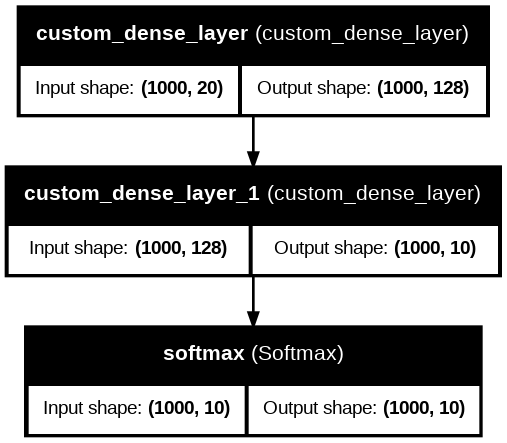

In [6]:
# Gera imagem para exibir a arquitetura do modelo
tf.keras.utils.plot_model(
    model,
    to_file=f"{model}_architecture.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=96,
    # layer_color_map=layer_color_map  # Adiciona cores às camadas
)

In [7]:
# Gerar dados aleatórios
x_train = np.random.random((1000, 20))
y_train = np.random.randint(10, size=(1000, 1))

# Converter rótulos para codificação categórica one-hot
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0821 - loss: 2.3036    
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1066 - loss: 2.3010 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1303 - loss: 2.2965 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1176 - loss: 2.2978 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1434 - loss: 2.2937 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1534 - loss: 2.2888 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1597 - loss: 2.2840 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1614 - loss: 2.2859 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1468 - loss: 2.2841 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1640 - loss: 2.2862 


In [8]:
# Gerar conjuntos aleatórios de dados de teste
x_test = np.random.random((200, 20))
y_test = np.random.randint(10, size=(200, 1))

# Converter rótulos para codificação categórica one-hot
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Avaliar o modelo
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0893 - loss: 2.3139  
Test loss: 2.311307907104492
Test accuracy: 0.10999999940395355


## **Criando e testando oito variações de parâmetros para 'model' (`'modelTest1'` a `'modelTest8'`) para comparação de resultados**

---



In [9]:
# Funções gerais
def recompile_model(model):
    """Recompila o modelo com o otimizador Adam, perda categorical_crossentropy e métrica de acurácia."""
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

def train_and_evaluate_model(model, x_train, y_train, x_test, y_test, epochs=10, batch_size=32):
    """Treina e avalia o modelo, retornando perda e acurácia."""
    model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
    return model.evaluate(x_test, y_test, verbose=0)

# Criando variações para model (modelTest1 a modelTest8)
# Novas configurações dos modelos teste
model_configs = [
    ("model", [custom_dense_layer(128), custom_dense_layer(10), Softmax()]),
    ("modelTest1", [custom_dense_layer(64), Dropout(0.5), custom_dense_layer(10), Softmax()]),
    ("modelTest2", [custom_dense_layer(128), custom_dense_layer(10), Softmax()]),
    ("modelTest3", [custom_dense_layer(128), custom_dense_layer(64), custom_dense_layer(10), Softmax()]),
    ("modelTest4", [custom_dense_layer(128), Dropout(0.2), custom_dense_layer(10), Softmax()]),
    ("modelTest5", [custom_dense_layer(128), BatchNormalization(), Dropout(0.3), custom_dense_layer(10), Softmax()]),
    ("modelTest6", [custom_dense_layer(256), custom_dense_layer(32), custom_dense_layer(10), Softmax()]),
    ("modelTest7", [custom_dense_layer(128), custom_dense_layer(64), custom_dense_layer(32), custom_dense_layer(10), Softmax()]),
    ("modelTest8", [custom_dense_layer(256), BatchNormalization(), Dropout(0.2), custom_dense_layer(128), custom_dense_layer(10), Softmax()])
]

# Treinamento e avaliação
results = []
for name, layers in model_configs:
    model = Sequential(layers)
    recompile_model(model)
    loss, accuracy = train_and_evaluate_model(model, x_train, y_train, x_test, y_test)
    results.append({"Model": name, "Loss": loss, "Accuracy": accuracy})

# Cria o DataFrame para results
df_results = pd.DataFrame(results)

# Visualização dos modelos com maior acurácia
best_model_name = df_results.loc[df_results['Accuracy'].idxmax(), 'Model']
best_model_config = next(layers for name, layers in model_configs if name == best_model_name)
best_model = Sequential(best_model_config)

# Construindo o modelo com a forma de entrada
best_model.build(input_shape=(None, x_train.shape[1]))

print("\nResumo do modelo com maior acurácia:")
best_model.summary()


Resumo do modelo com maior acurácia:


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ custom_dense_layer_4                 │ (None, 64)                  │           1,344 │
│ (custom_dense_layer)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ custom_dense_layer_5                 │ (None, 10)                  │             650 │
│ (custom_dense_layer)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_2 (Softmax)                  │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,994 (7.79 KB)

 Trainable params: 1,994 (7.79 KB)

 Non-trainable params: 0 (0.00 B)

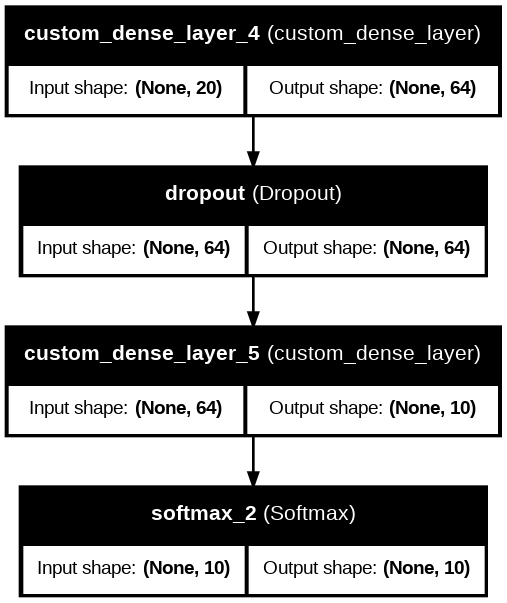

In [10]:
# Gera imagem para exibir a arquitetura do modelo
tf.keras.utils.plot_model(
    best_model,
    to_file=f"{best_model_name}_architecture.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=96,
    # layer_color_map=layer_color_map  # Adiciona cores às camadas
)

## **Avaliando os Resultados**

---



In [17]:
print(df_results)

        Model      Loss  Accuracy
0       model  2.305468     0.095
1  modelTest1  2.302558     0.120
2  modelTest2  2.314241     0.075
3  modelTest3  2.310864     0.055
4  modelTest4  2.308436     0.090
5  modelTest5  2.307246     0.105
6  modelTest6  2.301421     0.105
7  modelTest7  2.306836     0.100
8  modelTest8  2.321037     0.070


Com base nos resultados da tabela acima, pode-se analisar a performance dos modelos em termos de Loss (Perda) e Accuracy (Acurácia), sendo a "melhor" configuração a ser considerada àquela com **maior acurácia** e **menor perda**.

In [11]:
# Ordenar o DataFrame pela acurácia em ordem decrescente
df_results_sorted = df_results.sort_values(by='Accuracy', ascending=False)

# Exibir o DataFrame ordenado
print("\nDataFrame ordenado por acurácia:")
print(df_results_sorted)


DataFrame ordenado por acurácia:
        Model      Loss  Accuracy
1  modelTest1  2.302558     0.120
5  modelTest5  2.307246     0.105
6  modelTest6  2.301421     0.105
7  modelTest7  2.306836     0.100
0       model  2.305468     0.095
4  modelTest4  2.308436     0.090
2  modelTest2  2.314241     0.075
8  modelTest8  2.321037     0.070
3  modelTest3  2.310864     0.055


`modelTest1`, apesar de baixa, apresentou a melhor acurácia  (0.120) em comparação aos outros modelos, enquanto mantém uma perda competitiva (2.302558). Por utilizar uma camada Dropout com taxa de 50%, isto pode ter ajudado a reduzir o _overfitting_, melhorando a generalização.

## **Visualização Gráfica**

---


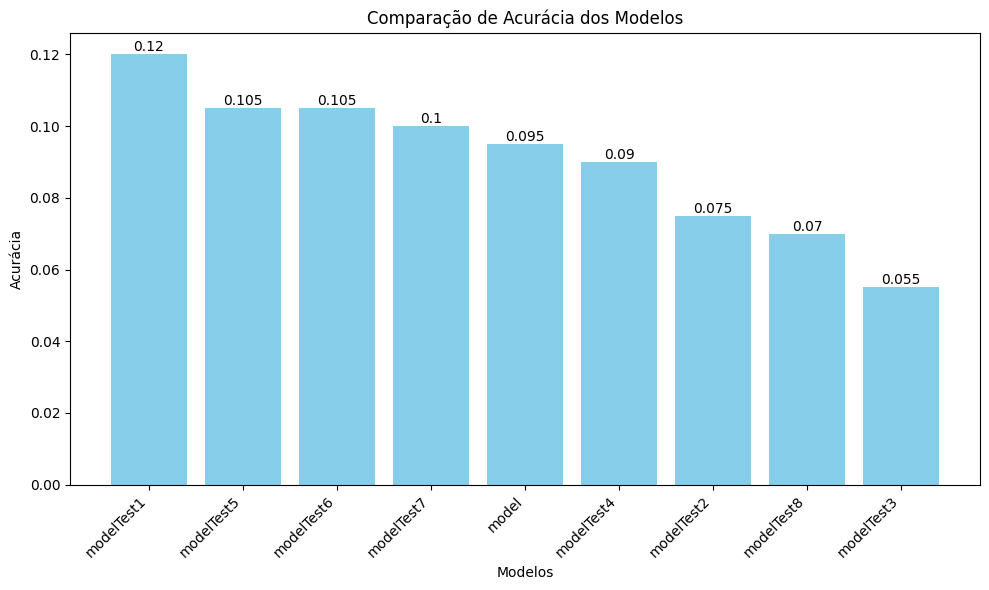

In [12]:
import matplotlib.pyplot as plt

# Exibição dos resultados com gráfico de barras
plt.figure(figsize=(10, 6))

# Atribuir a saída de plt.bar para bars
bars = plt.bar(df_results_sorted['Model'], df_results_sorted['Accuracy'], color='skyblue')

plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácia dos Modelos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom', ha='center')
plt.ylim(0, max(df_results_sorted['Accuracy']) * 1.05) # Define o limite superior do intervalo de 'Accuracy'
plt.show()

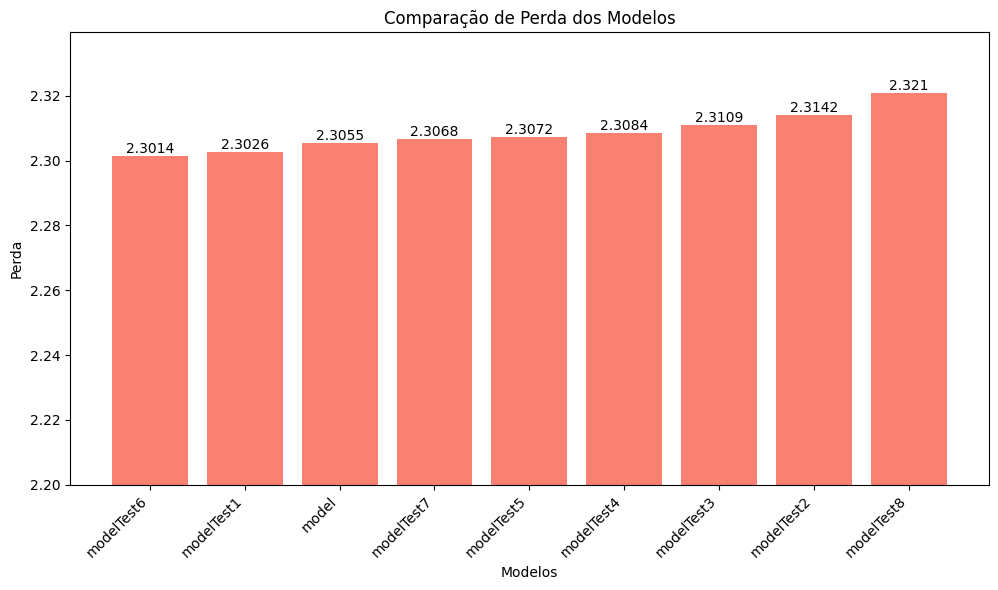

In [18]:
df_results_sorted = df_results.sort_values(by='Loss', ascending=True)

# Exibição dos resultados com gráfico de barras para Loss
plt.figure(figsize=(10, 6))
# Atribuir a saída de plt.bar para bars
bars = plt.bar(df_results_sorted['Model'], df_results_sorted['Loss'], color='salmon')
plt.xlabel('Modelos')
plt.ylabel('Perda')
plt.title('Comparação de Perda dos Modelos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom', ha='center')
plt.ylim(2.2, max(df_results_sorted['Loss']) * 1.008) # Define o limite superior do intervalo de 'loss'
plt.show()

# **Referências**

  GÉRON, Aurélien. **Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow**: Unsupervised Learning Techniques. O'Reilly Media, Incorporated, 2023.


  CHOLLET, Francois; CHOLLET, François. **Deep learning with Python**. simon and schuster, 2021.


  TENSORFLOW. **TensorFlow Python API Documentation**. Disponível em: https://www.tensorflow.org/api_docs/python/tf. Acesso em: 19 jan. 2025.